In [1]:
import os
from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'const_value':-5.000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-0.005,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':0.045,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'array_values':{'date':['2021-01-01'],'value':[-70000]},
                'target':'capex'
            }
    ]

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.15,
        'freq_di':'A',
        'qi':{'dist':'norm', 'kw':{'loc':2500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':'2021-01-01',
    'end':'2030-01-01',
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 80,
    'iter':10,
    'cashflow_params':cashflow_params
}
p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 2500, 'scale': 200} bbl/d 
 Di: 0.15 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2030, 1, 1), time_list=None, freq_input='A', freq_output='A', rate_limit=80.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=-5.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', const_value=-0.005, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', const_value=0.045, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='capex', const_value=None, periods=None, array_values=ChgPts(date=[datetime.date(2021, 1, 1)], value=[-70000.0]), target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=None, for

In [4]:
fore1 = p1.generate_forecast()
fore1

/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:240: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
2021,2236.851914,0.000000e+00,0,758167.365083,5000.0,2763.148086,0.552630,1.235284,0.000000e+00,0.0,1.122274e+06,1825000.0,pdp
2022,1925.276284,7.581674e+05,0,705364.031838,5000.0,3074.723716,0.614945,1.597030,1.122274e+06,1825000.0,1.171216e+06,1825000.0,pdp
2023,1657.100655,1.410728e+06,0,607112.448486,5000.0,3342.899345,0.668580,2.017318,2.342432e+06,3650000.0,1.262283e+06,1825000.0,pdp
2024,1426.279751,1.972392e+06,0,523160.206071,5000.0,3573.720249,0.714744,2.505624,3.646840e+06,5475000.0,1.342644e+06,1827500.0,pdp
2025,1227.105965,2.457048e+06,0,450288.162313,5000.0,3772.894035,0.754579,3.074628,5.027720e+06,7305000.0,1.410187e+06,1827500.0,pdp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,1255.213963,3.414371e+06,9,459873.104472,5000.0,3744.786037,0.748957,2.983385,5.965419e+06,9130000.0,1.398755e+06,1825000.0,pdp
2027,1080.372670,3.839818e+06,9,395816.449163,5000.0,3919.627330,0.783925,3.628033,7.396083e+06,10955000.0,1.458128e+06,1825000.0,pdp
2028,929.885375,4.206004e+06,9,341082.472657,5000.0,4070.114625,0.814023,4.377007,8.881675e+06,12780000.0,1.511390e+06,1827500.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

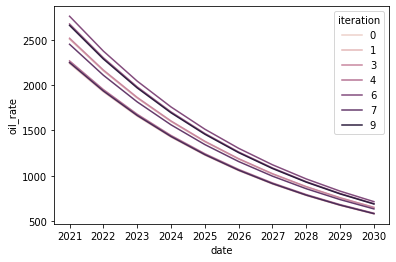

In [5]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration')

In [6]:
c1 = p1.generate_cashflow()

In [7]:
c1[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,capex,total_capex,fcf,cum_fcf
2021,34117.531429,34117.531429,-5.0,-3790.836825,-3795.836825,-70000.0,-70000.0,-39678.305397,-39678.305397
2022,31741.381433,31741.381433,-5.0,-3526.820159,-3531.820159,0.0,0.0,28209.561274,-11468.744123
2023,27320.060182,27320.060182,-5.0,-3035.562242,-3040.562242,0.0,0.0,24279.497939,12810.753816
2024,23542.209273,23542.209273,-5.0,-2615.801030,-2620.801030,0.0,0.0,20921.408243,33732.162059
2025,20262.967304,20262.967304,-5.0,-2251.440812,-2256.440812,0.0,0.0,18006.526493,51738.688552
2026,17412.882026,17412.882026,-5.0,-1934.764670,-1939.764670,0.0,0.0,15473.117357,67211.805908
2027,14987.406453,14987.406453,-5.0,-1665.267384,-1670.267384,0.0,0.0,13317.139069,80528.944978
2028,12914.929792,12914.929792,-5.0,-1434.992199,-1439.992199,0.0,0.0,11474.937593,92003.882571
2029,11115.983087,11115.983087,-5.0,-1235.109232,-1240.109232,0.0,0.0,9875.873855,101879.756426
2030,10267.560431,10267.560431,-5.0,-1140.840048,-1145.840048,0.0,0.0,9121.720383,111001.476809


In [8]:
p1.npv([0.10])

,npv,iteration
0.1,65538.606270,0
0.1,81928.445447,1
0.1,66112.532151,2
0.1,82520.891214,3
0.1,67368.256781,4
0.1,92043.606283,5
0.1,97219.185544,6
0.1,78478.931467,7
0.1,66268.491518,8
0.1,91086.836468,9


In [9]:
p1.irr(freq_output='A')

,irr
0,0.568796
1,0.737461
2,0.574196
3,0.744181
4,0.586127
5,0.859280
6,0.928039
7,0.699270
8,0.575669
9,0.847075


[ 0.   2.5  5.   7.5 10. ]
[1.25 1.25 1.25 1.25 1.25]
